In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...


/Users/konstantin/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1595629430416/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


60000

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [101]:
print("len = ", len(training_data))

print("target vector = ", training_data.targets)

print("\nclass names:")
for i, e in enumerate(training_data.classes):
    print(i, e)

print("\nclass assignment:")
for k,v in training_data.class_to_idx.items():
    print(v,k)

print("\ntrain_data type = ",type(training_data.train_data))

print("\nx[0] = ", training_data[0], training_data[0])

dir(training_data)

len =  60000
target vector =  tensor([9, 0, 0,  ..., 3, 0, 5])

class names:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

class assignment:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

train_data type =  <class 'torch.Tensor'>


AttributeError: 'tuple' object has no attribute 'shape'

In [8]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [11]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



In [216]:
device = "cpu"
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten()
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [217]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [218]:
from tqdm import tqdm

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    
    #train mode
    model.train()
    
    # results
    loss_log = []
    accuracy_log = []
    
    for batch, (X, y) in tqdm(enumerate(dataloader)):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        # batch evaluation
        loss_log.append(loss.item())
        accuracy_log.append((pred.argmax(1) == y).type(torch.float).sum().item())
    
    return loss_log, accuracy_log

In [219]:
def test(dataloader, model, loss_fn):
    
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    
    loss_log = []
    accuracy_log = []
    with torch.no_grad():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            
            # batch evaluation
            loss_log.append(loss.item())
            accuracy_log.append((pred.argmax(1) == y).type(torch.float).sum().item())
    
    return loss_log, accuracy_log

In [220]:
def model_run(model, loss_fn, optimizer):
  epochs = 100
  train_loss, test_loss, train_acc, test_acc = [],[],[],[]
  
  for t in range(epochs):
      
      loss, acc = train(train_dataloader, model, loss_fn, optimizer)
      train_loss += loss
      train_acc += acc      
      
      loss, acc = test(test_dataloader, model, loss_fn)
      test_loss += loss
      test_acc += acc
  
  return train_loss, train_acc, test_loss, test_acc


In [221]:
run_params = [(model, loss_fn, optimizer)] * 1

results = []
for i, param in enumerate(run_params):
    train_loss, train_acc, test_loss, test_acc = model_run(param[0], param[1], param[2])
    results.append({'train_loss':train_loss,'train_acc':train_acc,'test_loss':test_loss,'test_acc':test_acc})

938it [00:06, 136.55it/s]
100%|██████████| 157/157 [00:00<00:00, 175.05it/s]
938it [00:07, 132.70it/s]
100%|██████████| 157/157 [00:00<00:00, 191.44it/s]
938it [00:07, 128.98it/s]
100%|██████████| 157/157 [00:00<00:00, 173.69it/s]
938it [00:07, 120.58it/s]
100%|██████████| 157/157 [00:01<00:00, 133.90it/s]
938it [00:08, 105.52it/s]
100%|██████████| 157/157 [00:00<00:00, 176.03it/s]
938it [00:06, 134.73it/s]
100%|██████████| 157/157 [00:00<00:00, 181.58it/s]
938it [00:07, 124.99it/s]
100%|██████████| 157/157 [00:00<00:00, 202.17it/s]
938it [00:06, 136.97it/s]
100%|██████████| 157/157 [00:00<00:00, 183.96it/s]
938it [00:06, 142.27it/s]
100%|██████████| 157/157 [00:00<00:00, 201.89it/s]
938it [00:06, 141.46it/s]
100%|██████████| 157/157 [00:00<00:00, 190.63it/s]
938it [00:06, 143.12it/s]
100%|██████████| 157/157 [00:00<00:00, 205.87it/s]
938it [00:06, 141.46it/s]
100%|██████████| 157/157 [00:00<00:00, 190.62it/s]
938it [00:06, 144.92it/s]
100%|██████████| 157/157 [00:00<00:00, 201.43it/s]

ValueError: arrays must all be same length

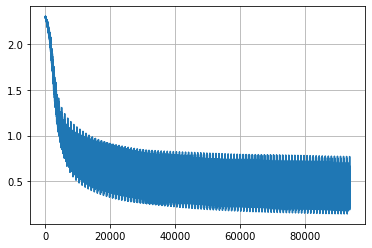

In [228]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(results[0]['train_loss'])
plt.plot(np.ma.average(results[0]['train_loss']))
plt.grid()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d

y = results[0]['train_loss']

fig, ax = plt.subplots(ncols=2)
ax[1].plot(x, y, color='dodgerblue')
ax[1].fill_between(x, upper, lower, color='crimson', alpha=0.2)

plt.show()


In [229]:
np.ma.average(results[0]['train_loss'], )

0.5632306466753613

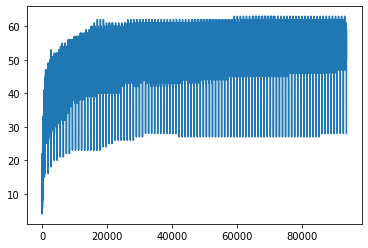

In [223]:
plt.plot(results[0]['train_acc'])

In [182]:
results[0][0][0]

[0.39305034279823303,
 0.30729934573173523,
 0.44052261114120483,
 0.5724703669548035,
 0.5759528875350952,
 0.4795520603656769,
 0.4012663662433624,
 0.4126700758934021,
 0.5416015982627869,
 0.5198168158531189,
 0.4827893376350403,
 0.33115947246551514,
 0.3733053207397461,
 0.47603461146354675,
 0.4459421634674072,
 0.5772793292999268,
 0.4916297495365143,
 0.6746588349342346,
 0.5366076827049255,
 0.45381709933280945,
 0.5090374946594238,
 0.4664851427078247,
 0.45791125297546387,
 0.45888128876686096,
 0.3742842376232147,
 0.41010013222694397,
 0.42427656054496765,
 0.39084622263908386,
 0.7270249128341675,
 0.39394471049308777,
 0.49604660272598267,
 0.38895341753959656,
 0.476762056350708,
 0.5226293206214905,
 0.5185800194740295,
 0.4207804799079895,
 0.3009741008281708,
 0.817721426486969,
 0.40118470788002014,
 0.46428972482681274,
 0.46502357721328735,
 0.5984079837799072,
 0.5028018951416016,
 0.716476321220398,
 0.44852152466773987,
 0.5786523222923279,
 0.5999372601509094

In [22]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [23]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth", weights_only=True))

TypeError: 'weights_only' is an invalid keyword argument for Unpickler()

In [125]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [31]:
model(x).argmax(0)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_forward_unimplemented',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'double

In [50]:
dir(loss_fn)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_forward_unimplemented',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'children',
 'cpu',

In [126]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [133]:
x_data

tensor([[1, 2],
        [3, 4]])